In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt

## Injury Result Distribution Versus Sex of Victim Recorded 

In [7]:
data = pd.read_csv('tfl_bus_safety.csv')
print(data.head())


   year date_of_incident route        operator  group_name  \
0  2015       2015-01-01     1  London General    Go-Ahead   
1  2015       2015-01-01     4       Metroline   Metroline   
2  2015       2015-01-01     5     East London  Stagecoach   
3  2015       2015-01-01     5     East London  Stagecoach   
4  2015       2015-01-01     6       Metroline   Metroline   

             bus_garage              borough  \
0  Garage Not Available            Southwark   
1  Garage Not Available            Islington   
2  Garage Not Available             Havering   
3  Garage Not Available  None London Borough   
4  Garage Not Available          Westminster   

                           injury_result_description incident_event_type  \
0                          Injuries treated on scene    Onboard Injuries   
1                          Injuries treated on scene    Onboard Injuries   
2  Taken to Hospital – Reported Serious Injury or...    Onboard Injuries   
3  Taken to Hospital – Reported Se

In [8]:
print(data.tail())

       year date_of_incident    route       operator     group_name  \
23153  2018       2018-09-01  (blank)    East London     Stagecoach   
23154  2018       2018-09-01  (blank)  London United  London United   
23155  2018       2018-09-01  (blank)  London United  London United   
23156  2018       2018-09-01  (blank)  London United  London United   
23157  2018       2018-09-01  (blank)      Metroline      Metroline   

           bus_garage               borough  injury_result_description  \
23153        West Ham                Newham  Injuries treated on scene   
23154        Hounslow         Not specified  Injuries treated on scene   
23155      Park Royal                Harrow  Injuries treated on scene   
23156  Shepherds Bush  Hammersmith & Fulham  Injuries treated on scene   
23157        Holloway             Islington  Injuries treated on scene   

      incident_event_type    victim_category victims_sex victims_age  
23153     Personal Injury         Bus Driver        Male 

   victims_sex                          injury_result_description   value
0       Female                                              Fatal    10.0
1         Male                                              Fatal    32.0
2      Unknown                                              Fatal     NaN
3       Female                          Injuries treated on scene  8816.0
4         Male                          Injuries treated on scene  5632.0
5      Unknown                          Injuries treated on scene  2888.0
6       Female        Reported Minor Injury - Treated at Hospital  1460.0
7         Male        Reported Minor Injury - Treated at Hospital  1006.0
8      Unknown        Reported Minor Injury - Treated at Hospital   320.0
9       Female  Taken to Hospital – Reported Serious Injury or...  1561.0
10        Male  Taken to Hospital – Reported Serious Injury or...  1039.0
11     Unknown  Taken to Hospital – Reported Serious Injury or...   394.0


<Axes: title={'center': 'Injuries Counts by Gender'}, xlabel='injury_result_description', ylabel='value'>

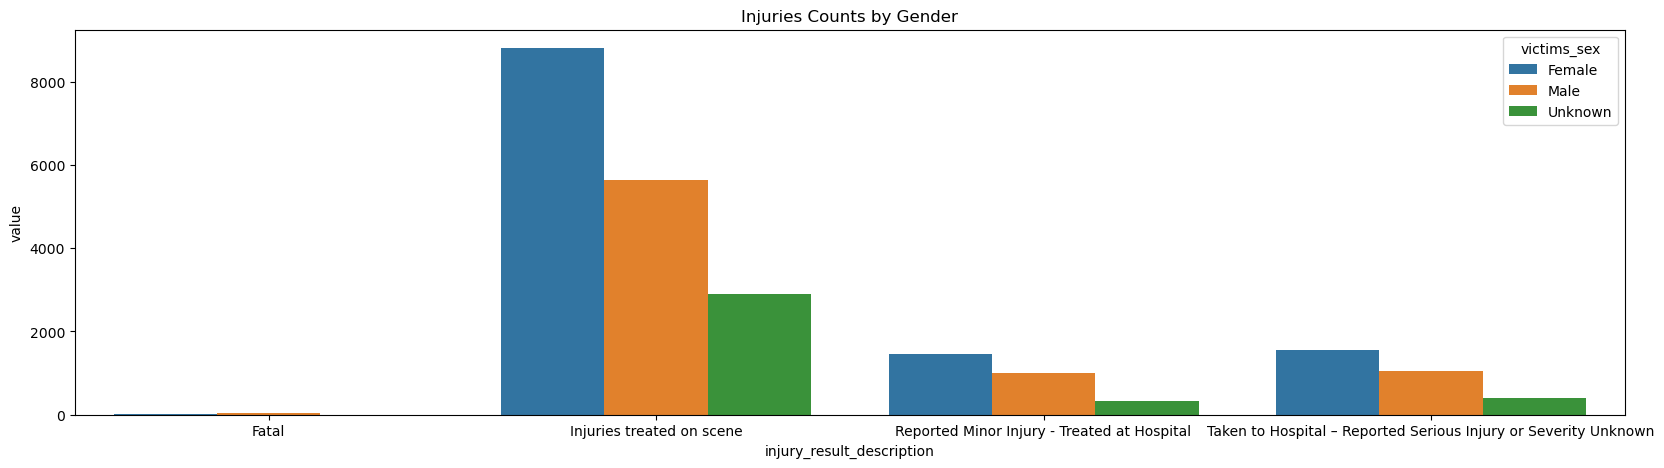

In [37]:
grouped = data.groupby(['victims_sex','injury_result_description'])['injury_result_description'].count()
grouped2 = grouped.unstack()
grouped3 = grouped2.reset_index()
grouped3.index.names = ['id']
grouped4 = pd.melt(grouped3,['victims_sex'])
print(grouped4)
fig = plt.figure(figsize=[20,5])
plt.title('Injuries Counts by Gender')
sb.barplot(x='injury_result_description',y='value',hue='victims_sex',data=grouped4)

## Obtain the top ten routes with injuries

  route  value
0   OOS    321
1    18    191
2    55    177
3    24    165
4    73    156
5    96    155
6   149    154
7   207    153
8    25    143
9    65    136


[]

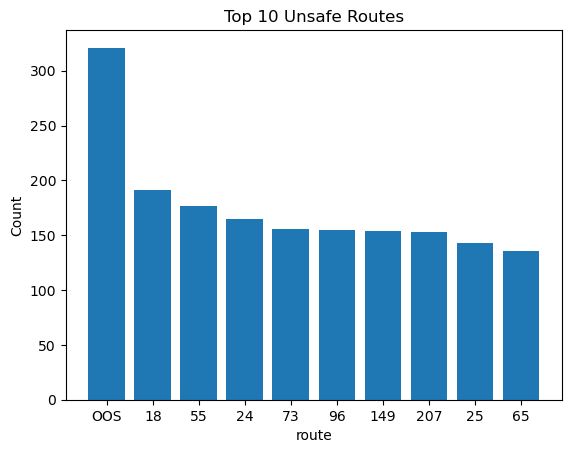

In [51]:
#most unsafe routes
routes = data['route'].groupby(data['route']).count().sort_values(ascending=False)[:10]
routes2 = routes.reset_index(name='value')
print(routes2)
plt.clf()
plt.bar(routes2['route'], routes2['value'])
plt.title('Top 10 Unsafe Routes')
plt.xlabel('route')
plt.ylabel('Count')
plt.plot()

## Incidents Categorized by Day of Week

<class 'pandas.core.series.Series'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas.core.series.Series'>
         day  Count
0     Monday   2618
1   Saturday   2701
2    Tuesday   3223
3   Thursday   3480
4     Friday   3571
5  Wednesday   3629
6     Sunday   3936


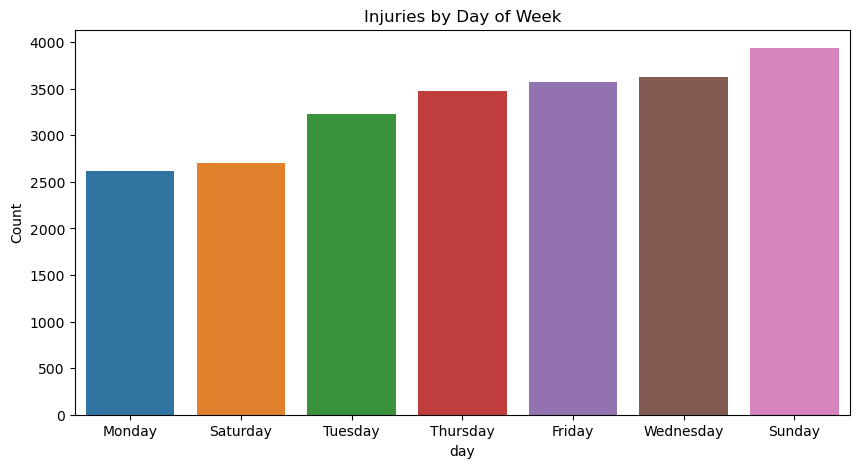

In [60]:
print(type(data['date_of_incident']))
print(type(pd.to_datetime(data['date_of_incident'][0])))
data['date_of_incident'] = pd.to_datetime(data['date_of_incident'])
data['day'] = data['date_of_incident'].dt.day_name()
print(type(data['date_of_incident']))
dayofweek = data['day'].groupby(data['day']).count().sort_values()
dayofweek = dayofweek.reset_index(name='Count')
print(dayofweek)
fig = plt.figure(figsize=[10,5])
plt.title('Injuries by Day of Week')
sb.barplot(x='day', y='Count', data=dayofweek)
plt.show()

## Incidents Categorized by Day of Week and Further Drilled Down

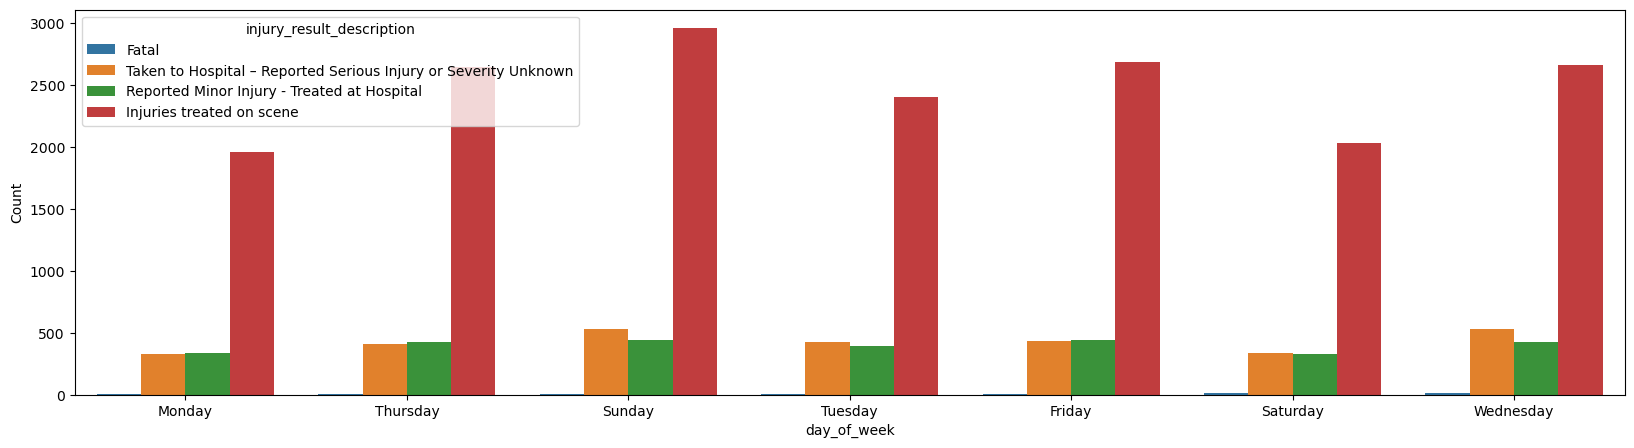

In [64]:
#types of injuries per day of week
injurybyday = data.groupby([data['injury_result_description'],data['day']],as_index=False).count().sort_values(by='year')
xdata = 'injury_result_description'
ydata = 'year'
fig = plt.figure(figsize=[20,5])
ax = sns.barplot(x='day',y=ydata,hue='injury_result_description',data=injurybyday)
ax.set(xlabel='day_of_week', ylabel='Count')
plt.show()

## General Split-Apply Function

In [65]:
#top4 func
def top_counts(df, n=4):
    operator_names = pd.Index([i for i,j,k in df.index]).unique()
    operators = []
    for name in operator_names:
            value = df.loc[name].sum()
            operators.append((name,value))
    top4 = sorted(operators, key= lambda x: x[1])[-n:]
    top4names = [i for i,j in top4]
    return df.loc[top4names]

In [67]:
#safety improvement/change year-over-year per operator (use pivot table and produce a line graph as an end result)
#5 operators with the most counts
operators = data.groupby(['operator','injury_result_description','year']).count()
top4 = operators.apply(top_counts)
display(top4.head())
overall_year = top4.groupby(['operator','year']).sum().reset_index()
display(overall_year.head())

date_of_incident  route  \
operator      injury_result_description year                            
London United Fatal                     2015                 2      2   
                                        2016                 1      1   
                                        2017                 3      3   
              Injuries treated on scene 2015               560    560   
                                        2016               411    411   

                                              group_name  bus_garage  borough  \
operator      injury_result_description year                                    
London United Fatal                     2015           2           2        2   
                                        2016           1           1        1   
                                        2017           3           3        3   
              Injuries treated on scene 2015         560         560      560   
                                        2016         411         411      411   

                                              incident_event_type  \
operator      injury_result_description year                        
London United Fatal                     2015                    2   
                                        2016                    1   
                                        2017                    3   
              Injuries treated on scene 2015                  560   
                                        2016                  411   

                                              victim_category  victims_sex  \
operator      injury_result_description year                                 
London United Fatal                     2015                2            2   
                                        2016                1            1   
                                        2017                3            3   
              Injuries treated on scene 2015              560          560   
                                        2016              411          411   

                                              victims_age  Date Of Incident  \
operator      injury_result_description year                                  
London United Fatal                     2015            2                 2   
                                        2016            1                 1   
                                        2017            3                 3   
              Injuries treated on scene 2015          560               560   
                                        2016          411               411   

                                              day  
operator      injury_result_description year       
London United Fatal                     2015    2  
                                        2016    1  
                                        2017    3  
              Injuries treated on scene 2015  560  
                                        2016  411

,operator,year,date_of_incident,route,group_name,bus_garage,borough,incident_event_type,victim_category,victims_sex,victims_age,Date Of Incident,day
0,Arriva London North,2015,789,789,789,789,789,789,789,789,789,789,789
1,Arriva London North,2016,656,656,656,656,656,656,656,656,656,656,656
2,Arriva London North,2017,1026,1026,1026,1026,1026,1026,1026,1026,1026,1026,1026
3,Arriva London North,2018,737,737,737,737,737,737,737,737,737,737,737
4,East London,2015,681,681,681,681,681,681,681,681,681,681,681


## Line Graph of Overall Incident Counts Per Year, Per Operator

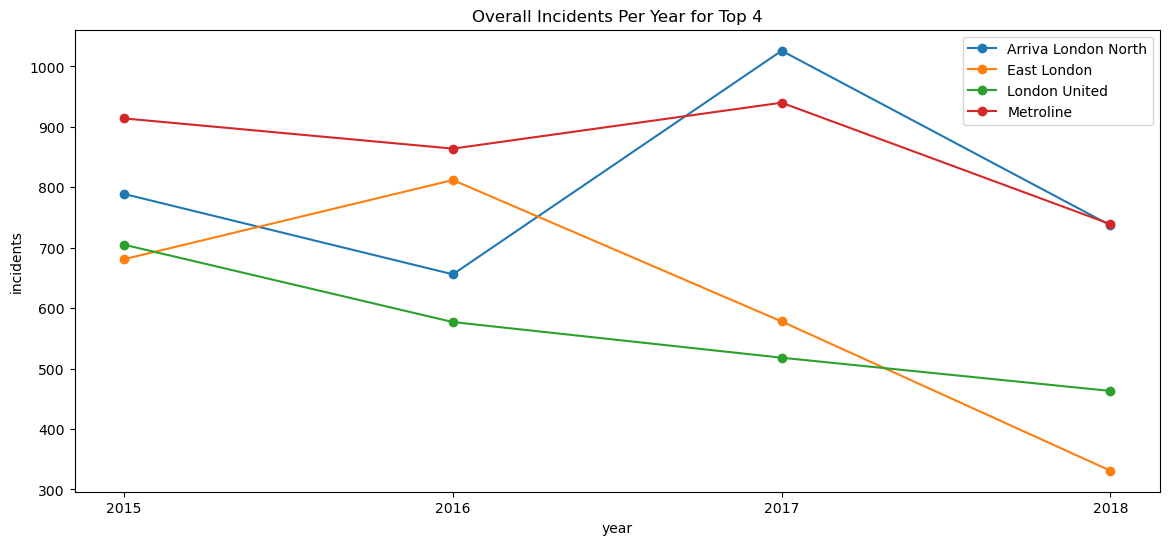

In [68]:

#Overall Incidents Line Graph
fig = plt.figure(figsize=[14,6])
ax = plt.subplot()
legend = []
for name in overall_year['operator'].unique():
    x = overall_year['year'][overall_year['operator'] == name]
    y = overall_year['route'][overall_year['operator'] == name]
    plt.plot(x,y, marker='o')
    legend.append(name)
plt.legend(legend)
ax.set_xticks([2015,2016,2017,2018])
plt.xlabel('year')
plt.ylabel('incidents')
plt.title('Overall Incidents Per Year for Top 4')
plt.show()

## Line Graphs Per Year, Per Operator Seperated by Incident Type


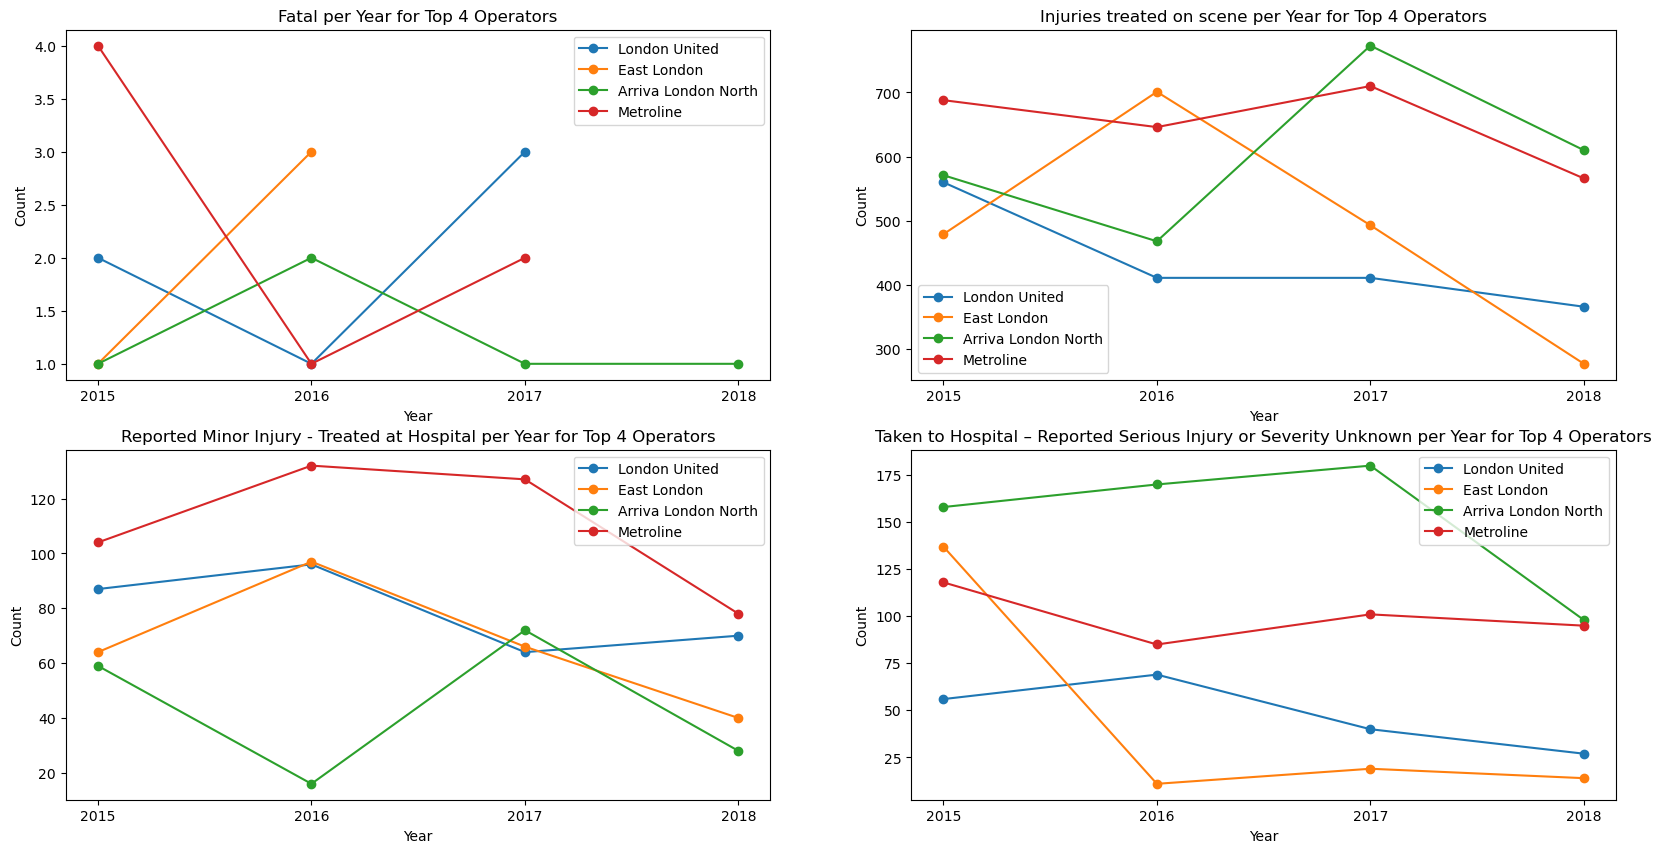

In [69]:
#individual line graphs for each incident type (top4 dataframe) with top4 operators as a legend
top4_2 = top4.reset_index()
fig, axes = plt.subplots(2,2, figsize=[20,10])
cat1 = 'injury_result_description'
cat2 = 'operator'
inj_labels = top4_2[cat1].unique()
op_labels = top4_2[cat2].unique()

z = 0
for i in range(2):
    for j in range(2):
        z += 1
        for k in range(len(op_labels)):
            x = top4_2['year'][(top4_2[cat2] == op_labels[k]) & (top4_2[cat1] == inj_labels[z-1])]
            y = top4_2['route'][(top4_2[cat2] == op_labels[k]) & (top4_2[cat1] == inj_labels[z-1])]
            axes[i,j].plot(x,y, label=op_labels[k], marker='o')
        axes[i,j].set_title('{} per Year for Top 4 Operators'.format(inj_labels[z-1]))
        axes[i,j].legend()
        axes[i,j].set_xticks([2015,2016,2017,2018])
        props = {'xlabel':'Year', 'ylabel':'Count'}
        axes[i,j].set(**props)

## Calculating Year-Over-Year Percentage Changes in Incident Occurences for Overall Incidents per Operator

In [70]:

#percent change table - try to obtain percent changes based on overall 
    
overall_year['pct_change'] = overall_year.groupby(['operator']).pct_change()['route'].apply(lambda x: x*100)
pct_change_inj = top4.groupby(['operator', 'injury_result_description']).pct_change().apply(lambda x: (x*100)).reset_index()
display(overall_year.head())
display(pct_change_inj.head(10))

,operator,year,date_of_incident,route,group_name,bus_garage,borough,incident_event_type,victim_category,victims_sex,victims_age,Date Of Incident,day,pct_change
0,Arriva London North,2015,789,789,789,789,789,789,789,789,789,789,789,NaN
1,Arriva London North,2016,656,656,656,656,656,656,656,656,656,656,656,-16.856781
2,Arriva London North,2017,1026,1026,1026,1026,1026,1026,1026,1026,1026,1026,1026,56.402439
3,Arriva London North,2018,737,737,737,737,737,737,737,737,737,737,737,-28.167641
4,East London,2015,681,681,681,681,681,681,681,681,681,681,681,NaN


,operator,injury_result_description,year,date_of_incident,route,group_name,bus_garage,borough,incident_event_type,victim_category,victims_sex,victims_age,Date Of Incident,day
0,London United,Fatal,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,London United,Fatal,2016,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000
2,London United,Fatal,2017,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
3,London United,Injuries treated on scene,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,London United,Injuries treated on scene,2016,-26.607143,-26.607143,-26.607143,-26.607143,-26.607143,-26.607143,-26.607143,-26.607143,-26.607143,-26.607143,-26.607143
5,London United,Injuries treated on scene,2017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,London United,Injuries treated on scene,2018,-10.948905,-10.948905,-10.948905,-10.948905,-10.948905,-10.948905,-10.948905,-10.948905,-10.948905,-10.948905,-10.948905
7,London United,Reported Minor Injury - Treated at Hospital,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,London United,Reported Minor Injury - Treated at Hospital,2016,10.344828,10.344828,10.344828,10.344828,10.344828,10.344828,10.344828,10.344828,10.344828,10.344828,10.344828
9,London United,Reported Minor Injury - Treated at Hospital,2017,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333


In [70]:

#percent change table - try to obtain percent changes based on overall 
    
overall_year['pct_change'] = overall_year.groupby(['operator']).pct_change()['route'].apply(lambda x: x*100)
pct_change_inj = top4.groupby(['operator', 'injury_result_description']).pct_change().apply(lambda x: (x*100)).reset_index()
display(overall_year.head())
display(pct_change_inj.head(10))

,operator,year,date_of_incident,route,group_name,bus_garage,borough,incident_event_type,victim_category,victims_sex,victims_age,Date Of Incident,day,pct_change
0,Arriva London North,2015,789,789,789,789,789,789,789,789,789,789,789,NaN
1,Arriva London North,2016,656,656,656,656,656,656,656,656,656,656,656,-16.856781
2,Arriva London North,2017,1026,1026,1026,1026,1026,1026,1026,1026,1026,1026,1026,56.402439
3,Arriva London North,2018,737,737,737,737,737,737,737,737,737,737,737,-28.167641
4,East London,2015,681,681,681,681,681,681,681,681,681,681,681,NaN


,operator,injury_result_description,year,date_of_incident,route,group_name,bus_garage,borough,incident_event_type,victim_category,victims_sex,victims_age,Date Of Incident,day
0,London United,Fatal,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,London United,Fatal,2016,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000
2,London United,Fatal,2017,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
3,London United,Injuries treated on scene,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,London United,Injuries treated on scene,2016,-26.607143,-26.607143,-26.607143,-26.607143,-26.607143,-26.607143,-26.607143,-26.607143,-26.607143,-26.607143,-26.607143
5,London United,Injuries treated on scene,2017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,London United,Injuries treated on scene,2018,-10.948905,-10.948905,-10.948905,-10.948905,-10.948905,-10.948905,-10.948905,-10.948905,-10.948905,-10.948905,-10.948905
7,London United,Reported Minor Injury - Treated at Hospital,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,London United,Reported Minor Injury - Treated at Hospital,2016,10.344828,10.344828,10.344828,10.344828,10.344828,10.344828,10.344828,10.344828,10.344828,10.344828,10.344828
9,London United,Reported Minor Injury - Treated at Hospital,2017,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333


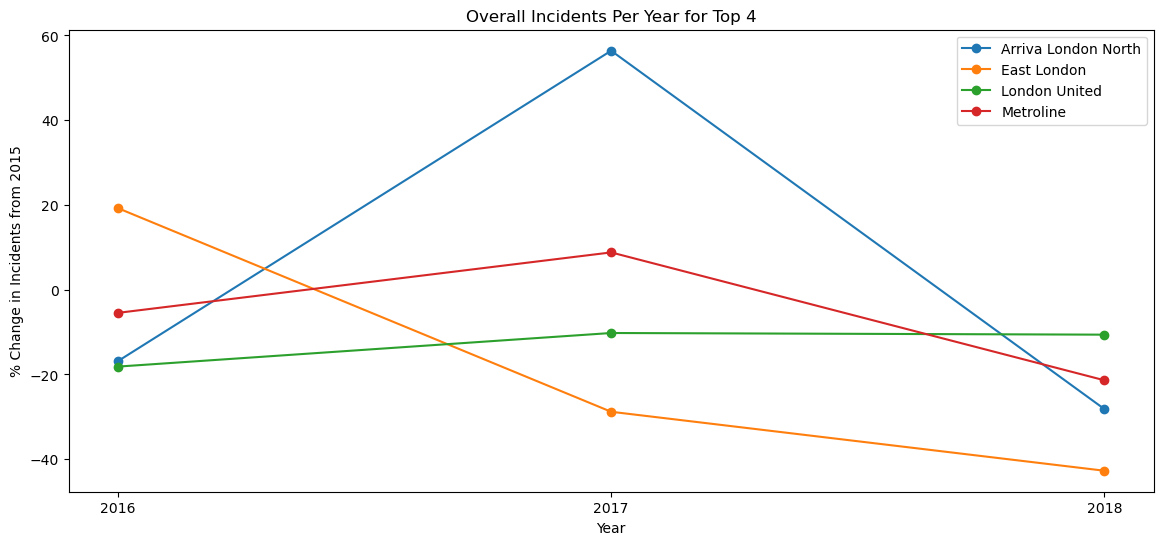

In [71]:
#overall percent changes line graph
fig = plt.figure(figsize=[14,6])
ax = plt.subplot()
legend = []
for name in overall_year['operator'].unique():
    x = overall_year['year'][overall_year['operator'] == name]
    y = overall_year['pct_change'][overall_year['operator'] == name]
    plt.plot(x,y, marker='o')
    legend.append(name)
plt.legend(legend)
ax.set_xticks([2016,2017,2018])
plt.xlabel('Year')
plt.ylabel('% Change in Incidents from 2015')
plt.title('Overall Incidents Per Year for Top 4')
plt.show()


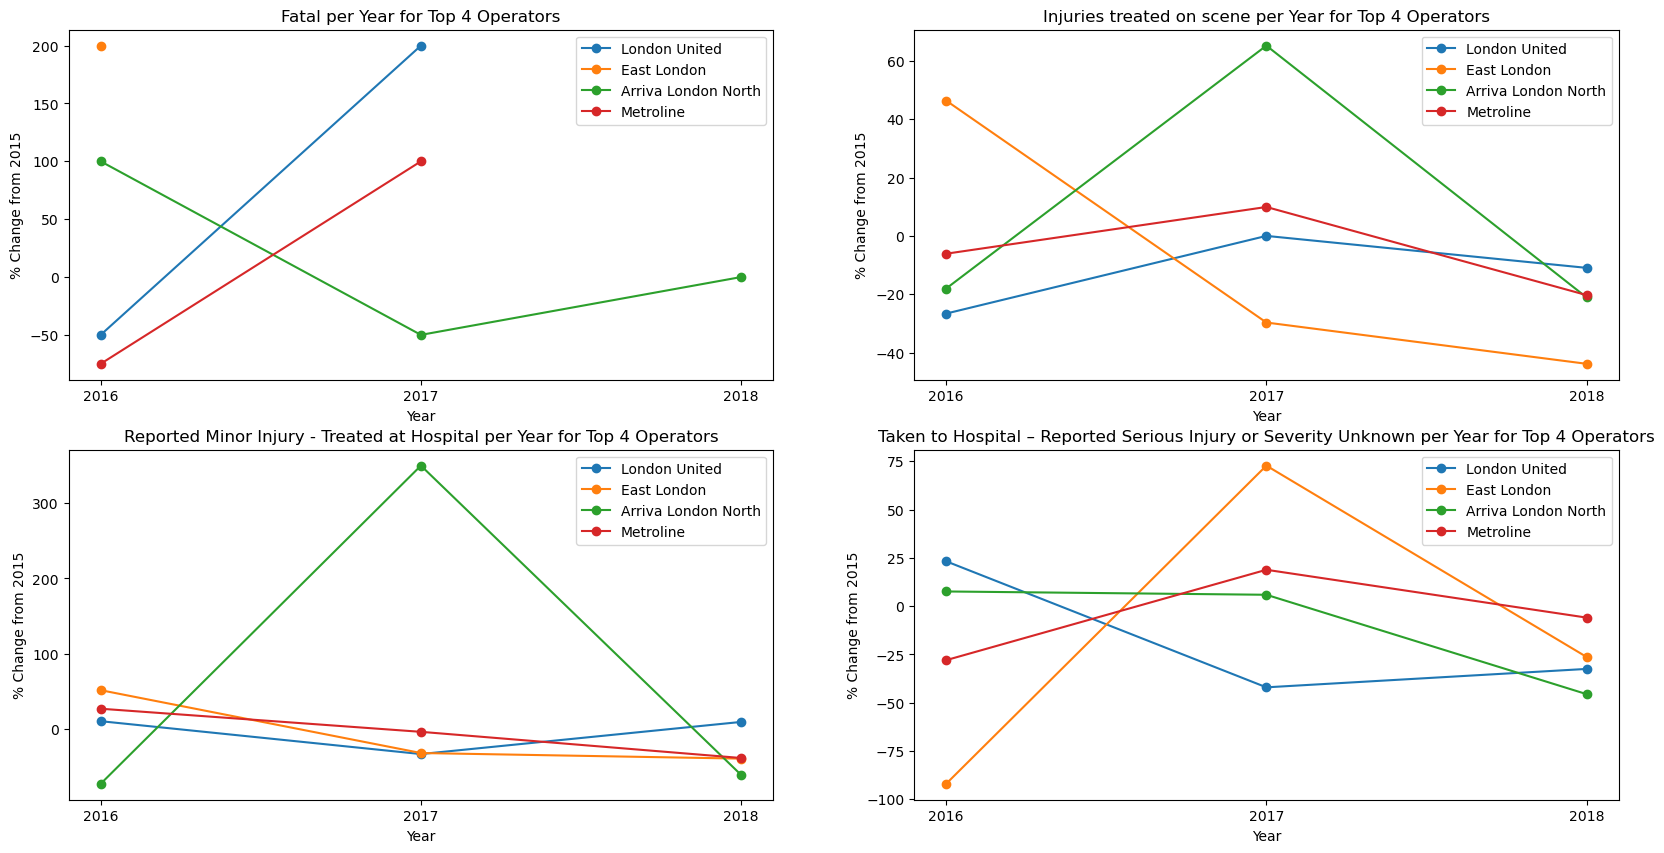

In [72]:
#Individual percent changes based on Injury Result Description

fig, axes = plt.subplots(2,2, figsize=[20,10])
cat1 = 'injury_result_description'
cat2 = 'operator'
inj_labels = pct_change_inj[cat1].unique()
op_labels = pct_change_inj[cat2].unique()

z = 0
for i in range(2):
    for j in range(2):
        z += 1
        for k in range(len(op_labels)):
            x = pct_change_inj['year'][(pct_change_inj[cat2] == op_labels[k]) & (pct_change_inj[cat1] == inj_labels[z-1])]
            y = pct_change_inj['route'][(pct_change_inj[cat2] == op_labels[k]) & (pct_change_inj[cat1] == inj_labels[z-1])]
            axes[i,j].plot(x,y, label=op_labels[k], marker='o')
        axes[i,j].set_title('{} per Year for Top 4 Operators'.format(inj_labels[z-1]))
        axes[i,j].legend()
        axes[i,j].set_xticks([2016,2017,2018])
        props = {'xlabel':'Year', 'ylabel':'% Change from 2015'}
        axes[i,j].set(**props)